In [1]:
# Writer : JESOON KANG, Dept. of Computer Science & Engineering in Chung-Ang University
# Last-Modified Date : April 17,2020

In [67]:
import matplotlib.pyplot as plt
import math
import numpy as np
import random
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision
import os
from random import *

In [68]:
### Setting up Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Below codes activates when want to use cpu
#device = torch.device('cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')

Using device: cuda

GeForce RTX 2060 SUPER
Memory Usage:
Allocated: 2.3 GB
Cached:    4.9 GB


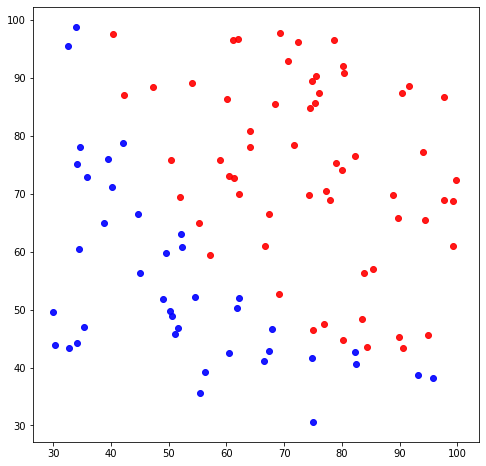

In [69]:
# Plot the training data
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data.txt", delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]

x_label0    = x[label == 0]
x_label1    = x[label == 1]

y_label0    = y[label == 0]
y_label1    = y[label == 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.9, c='b')
plt.scatter(x_label1, y_label1, alpha=0.9, c='r')
plt.show()

In [70]:
x = torch.FloatTensor(x).to('cuda')
y = torch.FloatTensor(y).to('cuda')
label = torch.FloatTensor(label).to('cuda')

x_label0 = torch.FloatTensor(x_label0).to('cuda')
x_label1 = torch.FloatTensor(x_label1).to('cuda')

y_label0 = torch.FloatTensor(y_label0).to('cuda')
y_label1 = torch.FloatTensor(y_label1).to('cuda')


In [72]:
# Initialize thetas 
th0 = torch.FloatTensor([5.0]).to('cuda')
th1 = torch.FloatTensor([10.0]).to('cuda')
th2 = torch.FloatTensor([10.0]).to('cuda')

def sigmoid(z) :
    return torch.reciprocal(torch.sum(1 + torch.exp(z)))

# Setting Step-size. (Learning-rate)
lr = 0.001

# Setting converge value
loss_conv = 1e-8 # loss converge standard

# Lists for logging
loss_log = []
th0_log = []
th1_log = []
th2_log = []
epoch_log = []
conv_count = 0 # Variable To count converge
epoch = 0 # Inital epoch value

test_loss_log = []


while (True) :
    epoch +=1
    epoch_log.append(epoch)
    
    ## Training 
    # Get Train yh
    z = th0 + th1*x + th2*y
    activ = 1 / (1+torch.exp(-z))
    
    m = len(activ)
    
    # Get Loss 
    loss = (1/m) * torch.sum( \
                             -label*torch.log(activ) - (1-label)*torch.log(1 - activ) )
    
    
    # Logging
    loss_log.append(loss)
    th0_log.append(th0)
    th1_log.append(th1)
    th2_log.append(th2)
    
    
    # Updating Parameters - Gradient Descent
    th0 = th0 - lr * (1/m) * torch.sum(activ - label)
    th1 = th1 - lr * (1/m) * torch.sum((activ-label)*x)
    th2 = th2 - lr * (1/m) * torch.sum((activ-label)*y)
    
    
    ## Does Train Loss Converged?
    if len(loss_log) > 2 :
        if abs(loss_log[-1] - loss_log[-2]) < loss_conv :
            conv_count += 1
        else :
            conv_count = 0
    
    # For monitor
    
    if epoch %100000 == 0 :
        acc = 0
        for i in range(0,len(activ)) :
            if activ[i] >= 0.5 :
                if label[i] == 1 :
                    acc += 1
            else :
                if label[i] == 0 :
                    acc += 1
        acc = acc / len(activ)
        print("epoch {}, th0 {:.5f}, th1 {:.5f}, th2 {:5f}, loss {:.10f}, acc {:.3f}".\
              format(epoch,th0.item(),th1.item(),th2.item(),loss_log[-1],acc) )
     
    ## Escape if Training loss is converged
    if conv_count > 3 :
        print("Loss is converged")
        print("epoch {}, th0 {:.5f}, th1 {:.5f}, th2 {:5f}, loss {:.10f}, acc {:.3f}".\
              format(epoch,th0.item(),th1.item(),th2.item(),loss_log[-1],acc))                 
        break



epoch 100000, th0 -2.59378, th1 0.02884, th2 0.020750, loss 0.4772032201, acc 0.770
epoch 200000, th0 -6.13822, th1 0.05538, th2 0.048635, loss 0.3477565050, acc 0.910
epoch 300000, th0 -8.32482, th1 0.07232, th2 0.065908, loss 0.2993580997, acc 0.920
epoch 400000, th0 -9.91144, th1 0.08477, th2 0.078508, loss 0.2740566134, acc 0.910
epoch 500000, th0 -11.15480, th1 0.09458, th2 0.088425, loss 0.2585031390, acc 0.910
epoch 600000, th0 -12.18040, th1 0.10270, th2 0.096632, loss 0.2479318231, acc 0.910
epoch 700000, th0 -13.06232, th1 0.10970, th2 0.103706, loss 0.2402086258, acc 0.890
epoch 800000, th0 -13.82130, th1 0.11573, th2 0.109805, loss 0.2344372869, acc 0.890
epoch 900000, th0 -14.48887, th1 0.12104, th2 0.115177, loss 0.2299534976, acc 0.890
epoch 1000000, th0 -15.07802, th1 0.12573, th2 0.119923, loss 0.2264118195, acc 0.890
epoch 1100000, th0 -15.63167, th1 0.13014, th2 0.124386, loss 0.2234077752, acc 0.890
epoch 1200000, th0 -16.10573, th1 0.13392, th2 0.128211, loss 0.221

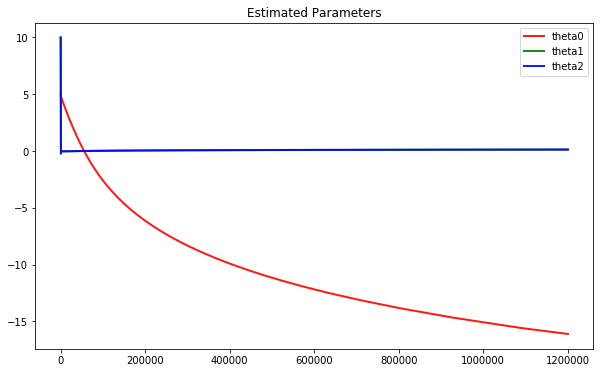

th0: -16.107011795043945 
th1: 0.13393078744411469 
th2: 0.12822172045707703


In [73]:
# 2. Plot the estimated parameters using the training dataset

plt.figure(figsize=(10, 6))
plot0, = plt.plot(epoch_log,th0_log, color='red',linewidth= 2,alpha=0.9)
plot1, = plt.plot(epoch_log,th1_log, color='green',linewidth= 2,alpha=0.9)
plot2, = plt.plot(epoch_log,th2_log, color='blue',linewidth= 2,alpha=0.9)

plt.title("Estimated Parameters") 
plt.legend([plot0,plot1,plot2],["theta0","theta1",'theta2'])

plt.show()


print("th0:",th0_log[-1].item(),"\nth1:",th1_log[-1].item(),"\nth2:",th2_log[-1].item())

Converged Training loss : 0.22106


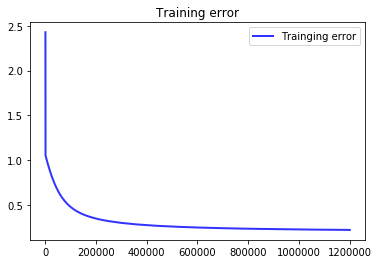

In [74]:
# 3. Plot the training error using the training dataset
plt.title("Training error")
plot, = plt.plot(epoch_log,loss_log, color='blue',linewidth=2,alpha=0.8)
plt.legend([plot],["Trainging error"])
print("Converged Training loss : {:.5f}".format(loss_log[-1].item()))

In [75]:
th0 = th0_log[-1]
th1 = th1_log[-1]
th2 = th2_log[-1]

# Get -30:30:0.1 tensor
xs = torch.linspace(start=30,end=100,steps=141,device='cuda')
ys = torch.linspace(start=30,end=100,steps=141,device='cuda')

datas = []
# FOr colormap test
for x in xs.cpu().numpy() :
    for y in ys.cpu().numpy():
        z = th0 + th1*x + th2*y
        activ = 1 / (1 + torch.exp(z))
        datas.append([x,y,(activ.item())])

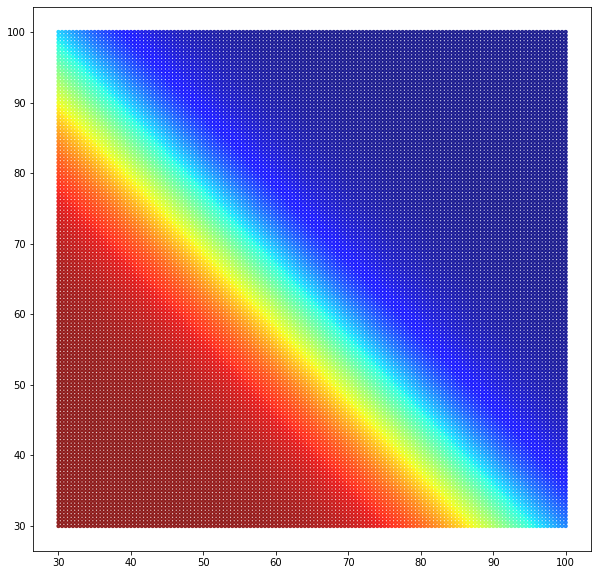

In [76]:
datas = np.array(datas)
xs = datas[:,0]
ys = datas[:,1]
colors = datas[:,2]
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(xs,ys,s=10, c =colors, cmap = plt.cm.jet, alpha = 0.8)
plt.show()